<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DanielRobertoMenesesLeon/blob/main/RegresionLogistica_Platzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
file = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-DanielRobertoMenesesLeon/main/diabetes_e5df1a05-5634-44ce-91df-7bc6143aa93e.csv'
df = pd.read_csv(file)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure']
x = df[feature_cols]
y = df.Outcome

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.25, random_state = 0)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train,  Y_train)
y_preg = logreg.predict(X_test)
y_preg

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [26]:
print('R squared: ', logreg.score(x, y))
#y_preg.score()
cnf_matrix = metrics.confusion_matrix(Y_test, y_preg)
cnf_matrix

#MSE = metrics.mean_squared_error(y_preg, Y)

R squared:  0.7734375


array([[118,  12],
       [ 27,  35]])

Text(0.5, 257.44, 'Etiquieta de prediccion')

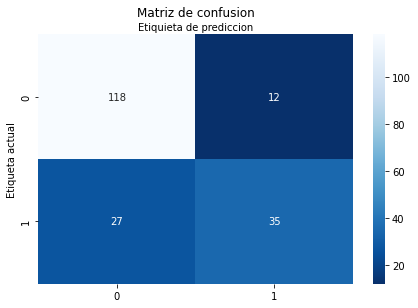

In [32]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiquieta de prediccion')

In [34]:
print('Exactitud: ', metrics.accuracy_score(Y_test, y_preg))
metrics.error_

Exactitud  0.796875
